In [67]:
import pandas as pd


In [81]:
from sklearn.datasets import load_digits

In [82]:
x,y = load_digits(return_X_y=True)

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV


In [101]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [102]:
mod = GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=3)

In [107]:
mod.fit(x,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002606,0.000365,0.004619,0.000459,1,{'model__n_neighbors': 1},0.774883,0.836414,0.834303,0.815200,0.028522,10
1,0.001918,0.000094,0.003330,0.000285,2,{'model__n_neighbors': 2},0.841431,0.852661,0.904611,0.866234,0.027521,6
2,0.001886,0.000160,0.003754,0.000560,3,{'model__n_neighbors': 3},0.848177,0.864278,0.903994,0.872150,0.023457,3
3,0.001882,0.000043,0.003717,0.000122,4,{'model__n_neighbors': 4},0.861164,0.865673,0.902375,0.876404,0.018456,1
4,0.002308,0.000452,0.004606,0.000370,5,{'model__n_neighbors': 5},0.851978,0.863321,0.895722,0.870340,0.018535,4
5,0.001892,0.000092,0.003739,0.000266,6,{'model__n_neighbors': 6},0.864336,0.856220,0.896131,0.872229,0.017223,2
6,0.001881,0.000046,0.004366,0.000606,7,{'model__n_neighbors': 7},0.861618,0.854641,0.888639,0.868299,0.014662,5
7,0.001801,0.000020,0.003932,0.000053,8,{'model__n_neighbors': 8},0.862366,0.847335,0.885502,0.865068,0.015698,7
8,0.001826,0.000024,0.004733,0.000417,9,{'model__n_neighbors': 9},0.852945,0.844077,0.884035,0.860352,0.017133,8
9,0.001804,0.000047,0.004177,0.000348,10,{'model__n_neighbors': 10},0.853633,0.832109,0.876198,0.853980,0.018001,9


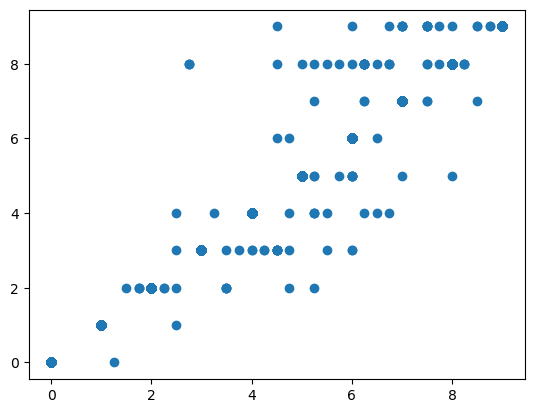

In [108]:
pred = mod.predict(x)
plt.scatter(pred,y)